In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from mcts import mcts
from mcts import firstActionPolicy
from mcts import randomPolicy
from simulator import farmcell
from bruteforce import bruteforce

import numpy as np
import matplotlib.pyplot as plt
import timeit

In [5]:
class Runner:
    def __init__(self, farm_size, agent_persists = False):
        self.n = farm_size
        self.agent_persists = agent_persists
        self.rewards = []
        self.full_tree_over_time = []        
        self.best_farm = None
        self.best_reward = 0

        farm = np.zeros((self.n, self.n), dtype=int)
        self.initialState = farmcell((0, 0), farm)

        if self.agent_persists:
            # When initializing the agent with the initial state, agent will keep
            # the built tree across searches i.e., the performance may improve (?) as we run more epochs.
            self.agent = mcts(timeLimit=1000, rolloutPolicy=randomPolicy, initialState=self.initialState)
        else:
            # If instead, we want to discard the tree after search and start new with next search, pass
            # the initialState to search method as a parameter instead.
            self.agent = mcts(timeLimit=1000, rolloutPolicy=randomPolicy)
        
    def run(self, epochs):        
        for i in range(epochs):
            if self.agent_persists:
                _ = self.agent.search()
            else:
                _ = self.agent.search(initialState=self.initialState)

            last_state, full_tree = self.agent.optimal_rollout()
            self.full_tree_over_time.append(1 if full_tree else 0)
            reward = last_state.state.getReward()
            self.rewards.append(reward)
            
            if reward > self.best_reward:
                self.best_reward = reward
                self.best_farm = last_state.state.farm
                
    def plot(self):
        print ('Best reward: {}'.format(self.best_reward))
        print ('Best farm:')
        print (self.best_farm)
        plt.subplot(2, 1, 1)
        plt.title('Reward with epochs')
        plt.plot(self.rewards)
        plt.ylabel('Reward')
        plt.subplot(2, 1, 2)
        plt.plot(self.full_tree_over_time)
        plt.ylabel('Fully built tree?')
        plt.show()
        
    def run_and_plot(self, epochs):
        self.run(epochs)
        self.plot()


Best reward: 138
Best farm:
[[1 1 1]
 [1 2 1]
 [1 1 1]]


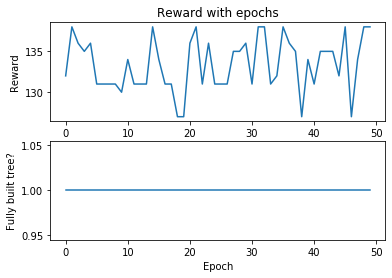

In [43]:
Runner(farm_size = 3).run_and_plot(epochs = 50)

Best reward: 135
Best farm:
[[1 1 1]
 [2 1 2]
 [1 1 1]]


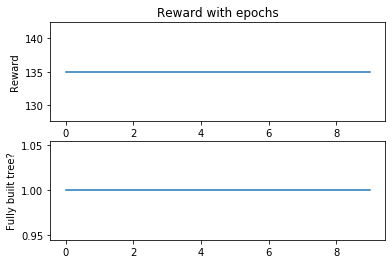

In [6]:
Runner(farm_size = 3, agent_persists = True).run_and_plot(epochs = 10)

Best reward: 242
Best farm:
[[1 1 1 1]
 [1 2 1 2]
 [1 2 1 1]
 [1 1 1 2]]


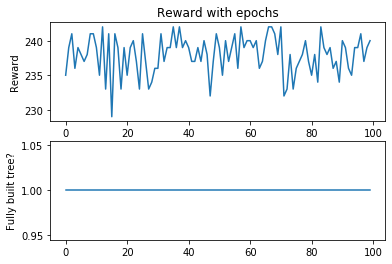

In [7]:
Runner(farm_size = 4).run_and_plot(epochs = 100)

Best reward: 1505
Best farm:
[[1 1 2 1 1 1 2 1 2 2]
 [2 1 2 1 1 1 1 1 2 1]
 [1 1 1 1 1 2 2 1 1 1]
 [1 2 1 1 2 1 1 1 2 1]
 [2 1 1 1 1 1 1 1 1 1]
 [1 1 2 1 2 1 2 1 1 1]
 [1 2 1 2 1 1 2 1 2 2]
 [2 1 1 1 1 1 1 2 1 1]
 [2 1 1 1 2 1 1 1 1 1]
 [1 1 2 1 2 1 1 2 2 1]]


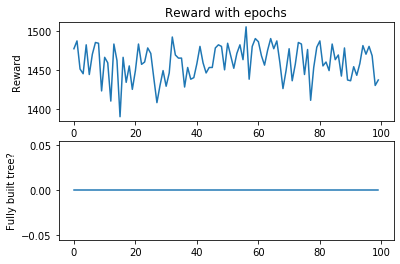

In [8]:
Runner(farm_size = 10).run_and_plot(epochs = 100)

In [13]:
# Try the brute force way (for small n) to compare against
def find_optimal_by_brute_force(farm_size):
    b = bruteforce(farm_size)
    start = timeit.default_timer()
    best_reward, best_farm, total_inputs = b.solve()
    end = timeit.default_timer()

    print ('best farm:')
    print (best_farm)
    print ('best_reward: {}'.format(best_reward))
    print ('total number of configurations need to be tested: {}'.format(total_inputs))
    print ('total time taken: {}'.format(end-start))

In [14]:
find_optimal_by_brute_force(3)

best farm:
[[1 1 1]
 [1 2 1]
 [1 1 1]]
best_reward: 138
total number of configurations need to be tested: 512
total time taken: 0.14634298599992235


In [15]:
find_optimal_by_brute_force(4)

best farm:
[[1 1 1 1]
 [1 2 1 2]
 [1 2 1 1]
 [1 1 1 2]]
best_reward: 242
total number of configurations need to be tested: 65536
total time taken: 31.47645004399999


In [ ]:
# find_optimal_by_brute_force(5) # This is expected to take more than 4 hours to run!!!